<a href="https://colab.research.google.com/github/kothale/titanic_classification/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action= 'ignore')

In [5]:
path = "/content/drive/MyDrive/titanic_train.csv"
data = pd.read_csv(path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv(path)
test = pd.read_csv(path)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [8]:
train.shape


(891, 12)

In [9]:
test.shape

(891, 12)

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train.describe(include= "all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [13]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [14]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [15]:
male_ind= len(train[train['Sex'] == 'male'])
print("No of Males in Titanic: ",male_ind)

No of Males in Titanic:  577


In [16]:
female_ind= len(train[train['Sex'] == 'female'])
print("No of Males in Titanic: ",female_ind)

No of Males in Titanic:  314


plotting

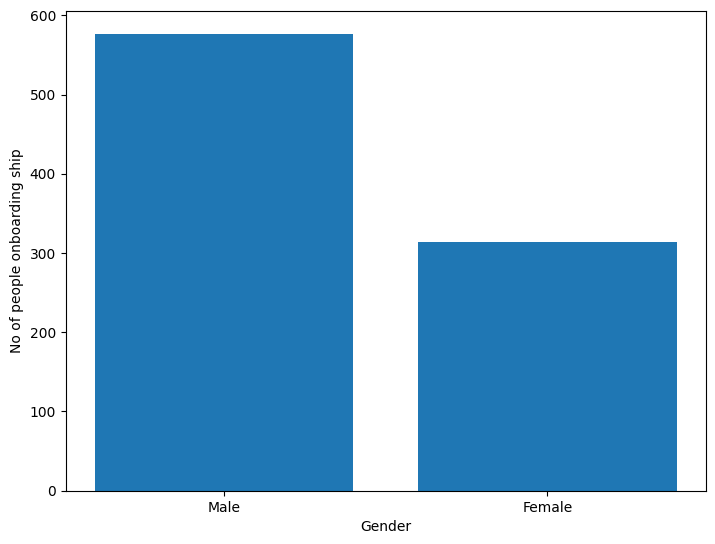

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [18]:
alive = len(train[train["Survived"] == 1])
dead = len(train[train["Survived"] == 0])

In [19]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


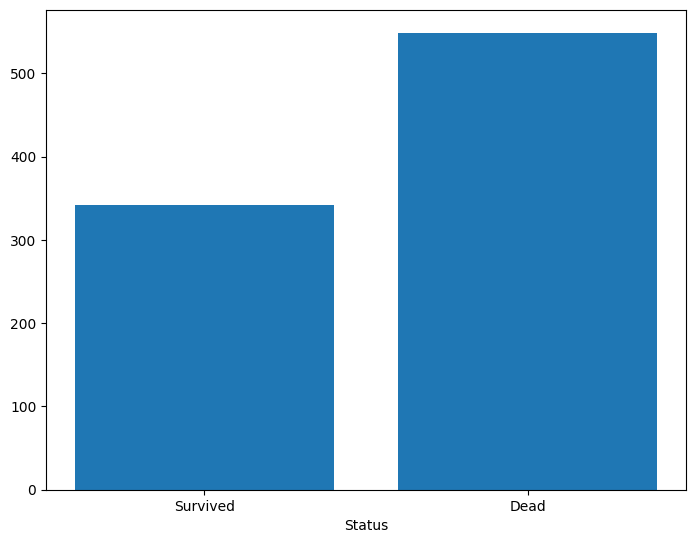

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, "Bar graph of people according to ticket class in which people couldn't survive")

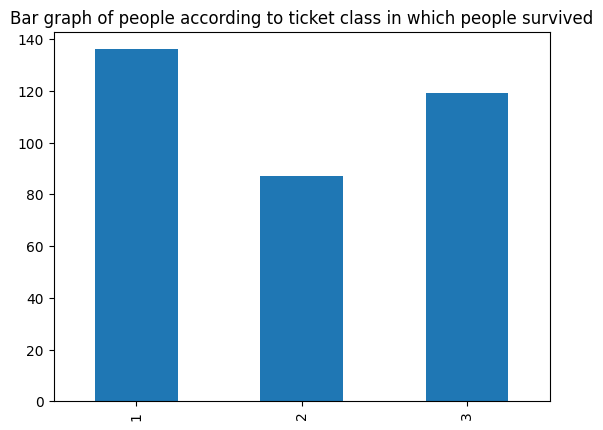

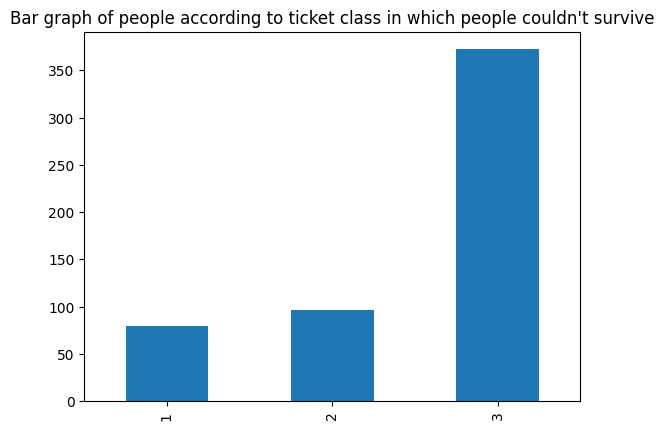

In [21]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people survived')

plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people couldn\'t survive')

([<matplotlib.axis.XTick at 0x79c32fcc38e0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

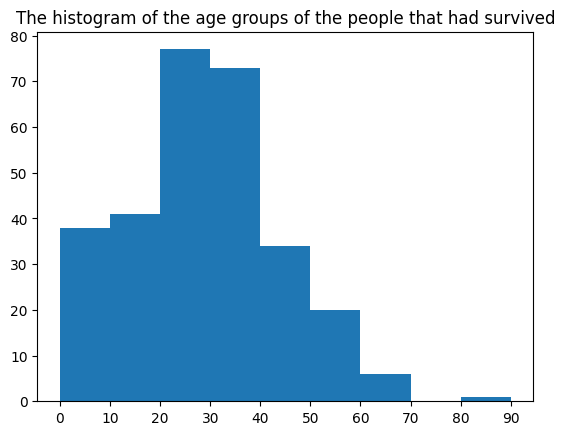

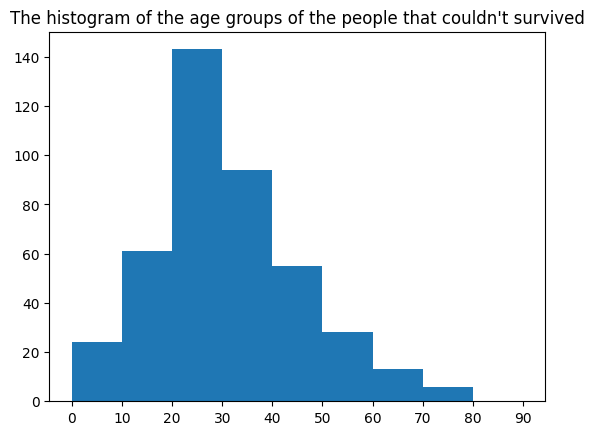

In [22]:
plt.figure(1)
age = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

plt.figure(2)
age = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that couldn\'t survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [23]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean(). sort_values (by= 'Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values (by= 'Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [25]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values (by= 'Age', ascending=False)

,Age,Survived
87,80.00,1.0
86,74.00,0.0
85,71.00,0.0
84,70.50,0.0
83,70.00,0.0
...,...,...
4,0.92,1.0
3,0.83,1.0
2,0.75,1.0
1,0.67,1.0


In [26]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values (by= 'Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


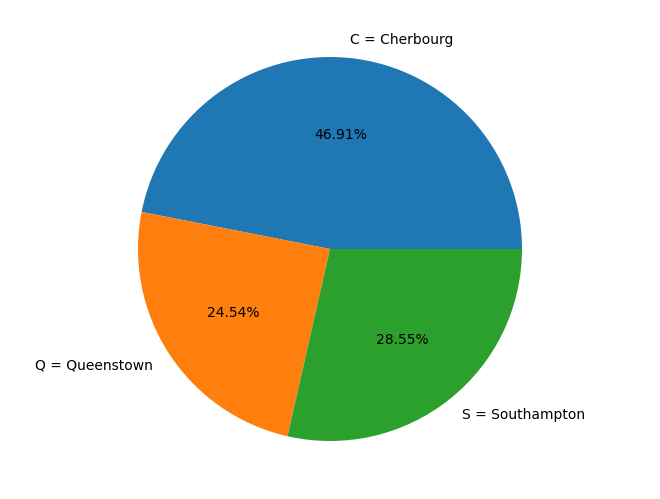

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.289610,0.336957]
ax.pie(s, labels = l,autopct= '%1.2f%%')
plt.show()

In [28]:
test.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


Dropping Useless Columns

In [29]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [30]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [31]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

Feature Selection



training values

In [32]:
column_train=['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
X=train[column_train]
Y=train['Survived']

In [33]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

now we have to fill all the missing values

age have 177 missing values


either we fill missing values with mean or median from existing values

In [34]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [35]:
X['Embarked']= train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

now we need to add convert sex into integer value

In [36]:
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [37]:
e={'C':0, 'Q':1, 'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head

<bound method NDFrame.head of 0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64>

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=7)

by logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(Y_test,Y_pred))

Accuracy Score:  0.7574626865671642


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


In [41]:
from sklearn.svm import SVC
model1 = SVC ()
model1.fit(X_train,Y_train)

pred_y =  model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc= ", accuracy_score (Y_test, pred_y))

Acc=  0.6604477611940298


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)

print(classification_report (Y_test,pred_y))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



using KNN Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy Score: ", accuracy_score (Y_test,y_pred2))

accuracy Score:  0.6567164179104478


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report (Y_test,y_pred2))

[[126  30]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       156
           1       0.62      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.65      0.66      0.64       268



using gaussianNB

In [45]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(Y_test,y_pred3))

Accuracy Score:  0.7686567164179104


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report (Y_test, y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [47]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion= 'entropy', random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7425373134328358


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report (Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [51]:
result = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Support Vector Machines','Naive Bayes','KNN','Decision Tree'],
    'Score' : [0.75,0.66,0.76,0.66,0.74]})

result_df = result.sort_values(by='Score',ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN
